In [131]:
import geopy
import pandas as pd


In [132]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="google")
location = geolocator.reverse("52.509669, 13.376294")
location

Location(Steinecke, Potsdamer Platz, Tiergarten, Mitte, Berlin, 10785, Deutschland, (52.5098134, 13.37631790998454, 0.0))

In [133]:
df = pd.read_csv("c:/users/media/test_file.csv")



In [134]:
df = pd.read_csv("c:/users/media/abcdef.csv")

# df.head(4)

In [135]:
df = df["Coordinates"]

In [136]:
df.head(4)

0    6.4559302, 3.3984452999999997
1    8.8525279, 5.4044267999999995
2             6.5316388, 3.3946601
3    6.5295451, 3.3641294000000004
Name: Coordinates, dtype: object

In [137]:
# for i in df:
#     j=0
#     print (i)
#     j+=1

In [139]:
# from geopy.geocoders import Nominatim

# def geolate (i)
# geolocator = Nominatim(user_agent="google")
#     location = geolocator.reverse(i)
#     print(location)

In [141]:
import csv
from geopy.geocoders import Nominatim
from tqdm import tqdm

def geocode_coordinates(input_file,output_file):
    # Create a new geocoder object
    geolocator = Nominatim(user_agent="google")

    # Open the CSV file
    with open(input_file, "r") as f:
        # Read the CSV file as a dictionary
        reader = csv.DictReader(f)
        # Create a list to store the modified rows
        rows = []
        # Iterate over the rows in the CSV file
        for row in reader:
#         for row in tqdm(reader, total=sum(1 for _ in f)):
            # Get the latitude and longitude from the row
            latitude = row["latitude"]
            longitude = row["longitude"]
            Customer = row["CUSTOMERNAME"]
            # Use the geocoder to get the address for the coordinates
            location = geolocator.reverse((latitude, longitude))
#             print(Customer+":" +location.address)
            # Add the address to the row
            row["address"] = location.address
            # Add the modified row to the list
            rows.append(row)

    # Open the CSV file in write mode
    with open(output_file, "w", newline="") as f:
        # Write the modified rows to the CSV file
        fieldnames = ["latitude", "longitude", "address","CUSTOMER'S RELATIONSHIP WITH ADDRESS", 'Type of Building', 
                      'Coordinates', 'Verification Message', 'Color of Building', 'ADDRESSLINE', 'ORGANIZATIONNAME',
                      'Area Profile', 'Gender', 
                      'Nearest Bus Stop', 'CUSTOMERNAME', 'ď»żIndex', 'STATE', 'Landmark', 'FIELDWORKER', 'BRANCH']
        writer = csv.DictWriter(f, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(rows)
        print("Your file is ready")

# Call the function to geocode the coordinates in the CSV file
geocode_coordinates("abcdef.csv","abcdef.csv")



In [66]:
import geopandas
import matplotlib as plt

In [119]:
df = pd.read_csv("c:/users/media/abcdef.csv")

# df_temp = df['Verification Message']
# df_temp.head(5)

# df_temp= df_temp.drop_duplicates(subset=['Verification Message'])
# df_temp

# # df_distinct = df.drop_duplicates(subset=['Verification Message'])
# # df_distinct



# df.head(4)
# df = df["Verification Message"] == 'Address Exist And Customer Is Known'

df_known_cust = df.loc[df['Verification Message'] == 'Address Exist And Customer Is Known']

df_not_known_cust = df.loc[df['Verification Message'] == 'Address Exist But Customer Is Not Known']

In [126]:
# df.head(5)



In [127]:
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.longitude, df.latitude))


gdf_known_cust = geopandas.GeoDataFrame(
    df_known_cust, geometry=geopandas.points_from_xy(df_known_cust.longitude, df_known_cust.latitude))



df_not_known_cust = geopandas.GeoDataFrame(
    df_not_known_cust, geometry=geopandas.points_from_xy(df_not_known_cust.longitude, df_not_known_cust.latitude))

C:\Users\media\AppData\Local\Programs\Python\Python310\lib\site-packages\geopandas\plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


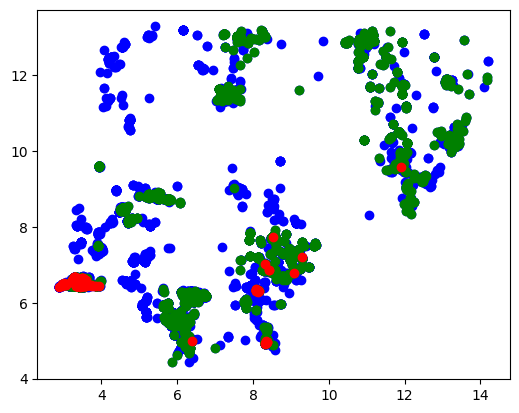

In [125]:
import matplotlib.pyplot as plt
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.continent == 'Nigeria'].plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='blue')
gdf.total_bounds


gdf_known_cust.plot(ax=ax, color='green')
gdf_known_cust.total_bounds


df_not_known_cust.plot(ax=ax, color='red')
df_not_known_cust.total_bounds


plt.show()


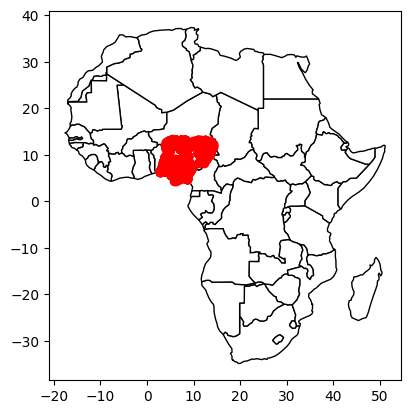

In [105]:
import matplotlib.pyplot as plt
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.continent == 'Africa'].plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')
gdf.total_bounds

plt.show()